In [214]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [241]:
sweep_ids = ['g1aqz63h', 'otphs2zh',
             'ey6eklbs', 'qeorz52u', 'ub1z75f4', 
             's45fguzh', '1cesj6eh', 
             'u4dl08fp', 'c04qhh64', '530kv26m']
config_names = ['tl_fast1', 'tl_fast1',
                'tl_fast1_aug1', 'tl_fast1_aug2', 'tl_fast1_aug3', 
                'tl_best5', 'tl_best5', 
                'tl_best5_aug1', 'tl_best5_aug2', 'tl_best5_aug3']

In [242]:
import wandb
api = wandb.Api()

In [243]:
metric = 'f1_score'

In [244]:
names, configs, f1_scores = [], [], []
for i, sweep_id in enumerate(sweep_ids):
    sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
    for run in sweep.runs:
        names.append(run.name)
        configs.append(config_names[i])
        f1_scores.append(run.summary[metric])

In [245]:
sweep_id = "m4nqsh6e"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("baseline")
f1_scores += list(pd.read_csv('logs/04_baseline_scratch_corrected_f1.csv')['f1_score'])[::-1]
sweep_id = "bk150cyb"
sweep = api.sweep(f"ogait/thesis_gravity_spy/{sweep_id}")
for run in sweep.runs:
    names.append(run.name)
    configs.append("baseline")
    f1_scores.append(run.summary[metric])

In [246]:
f1_df = pd.DataFrame(list(zip(configs[::-1], names[::-1], f1_scores[::-1])), columns=['config', 'name', metric])
f1_df.tail()

,config,name,f1_score
85,tl_fast1,devout-sweep-1,0.976330
86,tl_fast1,curious-sweep-2,0.975395
87,tl_fast1,trim-sweep-3,0.979741
88,tl_fast1,ethereal-sweep-4,0.980595
89,tl_fast1,swift-sweep-5,0.979934


In [252]:
f1_df.loc[f1_df['config']=='tl_fast1'].sort_values(by=metric)

,config,name,f1_score
86,tl_fast1,curious-sweep-2,0.975395
85,tl_fast1,devout-sweep-1,0.976330
82,tl_fast1,flowing-sweep-3,0.977220
83,tl_fast1,divine-sweep-4,0.978240
80,tl_fast1,celestial-sweep-1,0.979182
87,tl_fast1,trim-sweep-3,0.979741
81,tl_fast1,upbeat-sweep-2,0.979755
84,tl_fast1,jumping-sweep-5,0.979843
89,tl_fast1,swift-sweep-5,0.979934
88,tl_fast1,ethereal-sweep-4,0.980595


In [248]:
f1_df.sort_values(by=metric, ascending=False).head()

,config,name,f1_score
40,tl_best5,silvery-sweep-1,0.982102
23,tl_best5_aug2,absurd-sweep-4,0.981348
25,tl_best5_aug2,lilac-sweep-6,0.980996
7,baseline,soft-sweep-3,0.980712
88,tl_fast1,ethereal-sweep-4,0.980595


In [249]:
sns_colours = sns.color_palette()
sns_colours[1], sns_colours[5] = sns_colours[5], sns_colours[1]
sns_colours[5], sns_colours[7] = sns_colours[7], sns_colours[5]

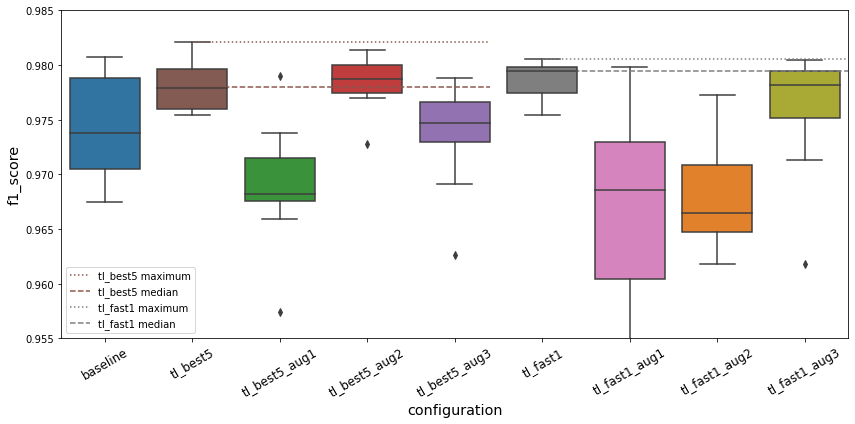

In [274]:
fig = plt.figure(figsize=(12, 6))
sns.boxplot(x='config', y=metric, data=f1_df, order=sorted(f1_df['config'].unique()), palette=sns_colours)
plt.ylim([0.955, 0.985])
plt.hlines(0.982102, 1, 4.4, linestyles='dotted', color=sns_colours[1], label='tl_best5 maximum')
plt.hlines(0.977965, 1, 4.4, linestyles='dashed', color=sns_colours[1], label='tl_best5 median')
plt.hlines(0.980595, 5, 8.5, linestyles='dotted', color=sns_colours[5], label='tl_fast1 maximum')
plt.hlines(0.979441, 5, 8.5, linestyles='dashed', color=sns_colours[5], label='tl_fast1 median')
#plt.hlines(0.973796, -0.5, 9.5, linestyles='dashed', color='grey', label='baseline median')

#plt.vlines(0.5, ymin=0.953, ymax=0.982, linestyles='dashed', color='grey')
#plt.vlines(4.5, ymin=0.945, ymax=0.982, linestyles='dashed', color='grey')

ax = plt.gca()
l = ax.get_ylabel()
ax.set_ylabel(l, size='x-large')
ax.set_xlabel("configuration", size='x-large')
plt.xticks(fontsize='large', rotation=30)
plt.legend()
#ax.set_xticks([])
fig.tight_layout()

fig.savefig('../figs/glitches/14_transfer_aug_scores.png', dpi=300)

In [272]:
f1_df.sort_values(by='f1_score', ascending=False).head(10)

,config,name,f1_score
40,tl_best5,silvery-sweep-1,0.982102
23,tl_best5_aug2,absurd-sweep-4,0.981348
25,tl_best5_aug2,lilac-sweep-6,0.980996
7,baseline,soft-sweep-3,0.980712
88,tl_fast1,ethereal-sweep-4,0.980595
52,tl_fast1_aug3,glad-sweep-3,0.980439
48,tl_best5,logical-sweep-4,0.980402
2,baseline,happy-sweep-3,0.980292
21,tl_best5_aug2,glamorous-sweep-2,0.980051
46,tl_best5,dashing-sweep-2,0.979969


In [271]:
f1_df.groupby('config').describe()

f1_score                                                    \
                 count      mean       std       min       25%       50%   
config                                                                     
baseline          10.0  0.974322  0.004977  0.967499  0.970500  0.973796   
tl_best5          10.0  0.978062  0.002263  0.975448  0.976008  0.977913   
tl_best5_aug1     10.0  0.968944  0.005602  0.957371  0.967590  0.968218   
tl_best5_aug2     10.0  0.978451  0.002523  0.972747  0.977417  0.978698   
tl_best5_aug3     10.0  0.973687  0.004732  0.962613  0.972947  0.974738   
tl_fast1          10.0  0.978623  0.001755  0.975395  0.977475  0.979461   
tl_fast1_aug1     10.0  0.966440  0.010393  0.944606  0.960429  0.968540   
tl_fast1_aug2     10.0  0.968060  0.004915  0.961766  0.964721  0.966448   
tl_fast1_aug3     10.0  0.975962  0.005705  0.961824  0.975133  0.978171   

                                   
                    75%       max  
config                             
baseline       0.978832  0.980712  
tl_best5       0.979684  0.982102  
tl_best5_aug1  0.971487  0.978998  
tl_best5_aug2  0.980011  0.981348  
tl_best5_aug3  0.976667  0.978821  
tl_fast1       0.979821  0.980595  
tl_fast1_aug1  0.972919  0.979823  
tl_fast1_aug2  0.970816  0.977305  
tl_fast1_aug3  0.979449  0.980439

baseline: 97.4 +- 0.5  
tl_best5: 97.8 +- 0.2  
tl_fast1: 97.9 +- 0.2  